[Work in Progress] Correlating Economic Indicators and Suicide Rate: A Philippine Outlook

Problem:
Find an economic indicator with a positive correlation with suicide rate.
Use said indicator to create a model for forecasting suicide rate.

Limitation:
Use data only between 2000-2018/2019
-Philippine Suicide Rate earliest available data is from 2000
-Excluded 2020 data because of COVID-19 pandemic which could have introduced one or more factors that severely aggravated the country's suicide rate. The identification of said factors are outside the scope of this meta-analysis.


*Dataset obtained from World Bank Open Database

Economic Indicators Looked At:

Inflation Rate
Gross Domestic Product (GDP) Growth
Unemployment Rate
Consumer Price Index

68.87966805
Pearson's correlation: 
Model Coefficients: [[0.40733532]]
Mean Absolute Error: 0.1311511101481756
Coefficient of Determination: 0.5563824913014945
Linear Regression prediction: 
[[0.55389563]
 [0.33326109]
 [0.60279089]
 [0.39244809]]
Actual Values:
      Female Suicide
2012            0.75
2004            0.25
2015            0.50
2006            0.25
SVR prediction: 
[0.51927428 0.61734575 0.50907663 0.74346634]
Actual Values:
2015    0.500
2013    0.625
2017    0.500
2012    0.750
Name: Female Suicide, dtype: float64


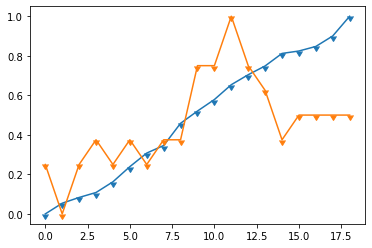

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




def selectMinMax(spec_array):
    min_max = [spec_array[0],spec_array[0]]    
    for i in spec_array:
        if(min_max[1]<float(i)):
            min_max[1]=float(i)
        if(min_max[0]>float(i)):
            min_max[0]=float(i)
    return min_max

def normalize(min_max,feed):
    normalized =np.empty(len(feed),dtype=float)
    counter = 0
    for i in feed:
        normalized[counter] = ((float(i)-min_max[0])/(min_max[1]-min_max[0]))
        counter+=1
    return normalized
    

#load dataset
dataset = pd.read_csv("data_source/economic_measures_suicide_rate.csv", usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
dataset = dataset.dropna()


cpi = dataset.iloc[4]
suicide_female = dataset.iloc[5]
suicide_male = dataset.iloc[6]

counter=0

for row in cpi:
    if(isinstance(row,float)==False):
        print(row)
        row = np.float64(row)
    
# for i in cpi.values:
#     print(i)
#     print(type(i))

#check for correlation
x= cpi.array.to_numpy().squeeze()
y=suicide_female.to_numpy().squeeze()
# z=suicide_male.to_numpy().squeeze()
#print(x)
print("Pearson's correlation: ")
#print(cpi.values)
#print(np.corrcoef(x,y))

min_max=selectMinMax(cpi.to_numpy())
normalized_cpi=normalize(min_max,cpi.to_numpy())

plt.plot(normalized_cpi,label="Consumer Price Index",marker=11)

min_max=selectMinMax(suicide_female.to_numpy())
normalized_suicide_f=normalize(min_max,suicide_female.to_numpy())

plt.plot(normalized_suicide_f,label="Female Suicie",marker=11)

a = np.array(normalized_cpi)
b= np.array(normalized_suicide_f)

pd_setup = pd.DataFrame({'CPI':a.ravel(),'Female Suicide':b.ravel()})
pd_setup = pd_setup.set_axis(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'],axis=0)

# Split Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(pd_setup[['CPI']], pd_setup[['Female Suicide']], test_size=0.2)

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

print("Linear Regression prediction: ")
print(y_pred)
print("Actual Values:")
print(y_test)

X_train, X_test, y_train, y_test=train_test_split(pd_setup,pd_setup['Female Suicide'], test_size=0.2, random_state=100)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("SVR prediction: ")
print(y_pred)
print("Actual Values:")
print(y_test)
